what does the hetionet network look like? also full of mega hubs?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from tqdm import tqdm

In [2]:
%matplotlib inline

## Read original hetionet

In [3]:
nodes = pd.read_csv(
    "data/hetio_nodes.tsv", sep='\t'
)

In [4]:
nodes.head()

,node_uid,node_id,name,het_type
0,0,DB00795,Sulfasalazine,Compound
1,1,N0000000151,Histamine H2 Receptor Antagonists,Pharmacologic Class
2,2,100996420,DNM1P50,Gene
3,3,DB04898,Ximelagatran,Compound
4,4,C0278151,Facial spasm,Side Effect


In [5]:
edges = pd.read_csv(
    "data/hetio_edges.tsv", sep='\t', low_memory=False
)

In [6]:
edges.shape

(2249052, 5)

In [7]:
edges.head()

,start_id,end_id,het_etype,source_uid,target_uid
0,8568,GO:0042254,PARTICIPATES_GpBP,26311,5975
1,6201,GO:0042254,PARTICIPATES_GpBP,9449,5975
2,6223,GO:0042254,PARTICIPATES_GpBP,32586,5975
3,6202,GO:0042254,PARTICIPATES_GpBP,21669,5975
4,65003,GO:0042254,PARTICIPATES_GpBP,20653,5975


---

In [8]:
def get_adjlist(edges):
    adjlist = defaultdict(set)

    for suid, tuid in tqdm(zip(edges["source_uid"], edges["target_uid"]),
        total=len(edges)
        ):

            adjlist[suid].add(tuid)
            adjlist[tuid].add(suid)
    
    return adjlist

In [9]:
def get_neighbours(adjlist):
    return (pd
        .DataFrame(
            [(node, len(vals)) for node, vals in adjlist.items()],
            columns = ["node_uid", "num_neighbours"]
        )
        .assign(log_neighbours = lambda df: np.log10(df["num_neighbours"]))
    )

In [10]:
adj_list = get_adjlist(edges)

100%|██████████| 2249052/2249052 [00:02<00:00, 926103.95it/s]


In [11]:
neighbours = get_neighbours(adj_list)

Text(0,0.5,'Total probability')

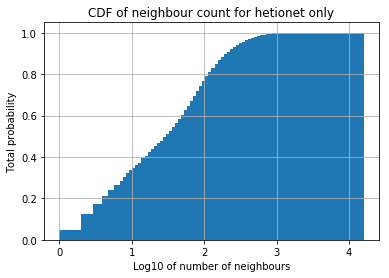

In [12]:
ax = neighbours["log_neighbours"].hist(
    cumulative=True, bins=100, density=True
)

ax.set_title("CDF of neighbour count for hetionet only")
ax.set_xlabel("Log10 of number of neighbours")
ax.set_ylabel("Total probability")

In [13]:
neighbours["num_neighbours"].median()

30.0

---

## Neighbours by semantic type

In [14]:
lab_neigh = (neighbours
    .merge(
        nodes, how="inner", on="node_uid"
    )
)

In [15]:
lab_neigh.head()

,node_uid,num_neighbours,log_neighbours,node_id,name,het_type
0,0,27,1.431364,DB00795,Sulfasalazine,Compound
1,1,4,0.602060,N0000000151,Histamine H2 Receptor Antagonists,Pharmacologic Class
2,3,2,0.301030,DB04898,Ximelagatran,Compound
3,4,4,0.602060,C0278151,Facial spasm,Side Effect
4,5,8,0.903090,56136,PCDHA13,Gene


Text(0,0.5,'Node semantic type')

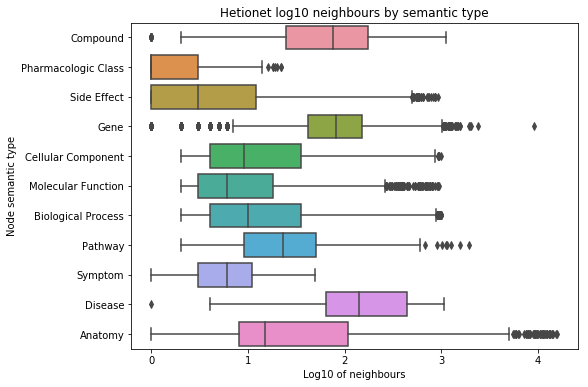

In [16]:
plt.figure(figsize=(8, 6))

ax = sns.boxplot(data=lab_neigh, y="het_type", x="log_neighbours")
ax.set_title("Hetionet log10 neighbours by semantic type")
ax.set_xlabel("Log10 of neighbours")
ax.set_ylabel("Node semantic type")

In [17]:
lab_neigh.head()

,node_uid,num_neighbours,log_neighbours,node_id,name,het_type
0,0,27,1.431364,DB00795,Sulfasalazine,Compound
1,1,4,0.602060,N0000000151,Histamine H2 Receptor Antagonists,Pharmacologic Class
2,3,2,0.301030,DB04898,Ximelagatran,Compound
3,4,4,0.602060,C0278151,Facial spasm,Side Effect
4,5,8,0.903090,56136,PCDHA13,Gene


In [18]:
(lab_neigh
    .drop(["node_uid", "node_id"], axis=1)
    .sort_values("num_neighbours", ascending=False)
    .groupby("het_type")
    .head(10)
    .sort_values(["het_type", "num_neighbours"], ascending=[True, False])
    .reset_index(drop=True)
)

,num_neighbours,log_neighbours,name,het_type
0,15981,4.203604,brain,Anatomy
1,15519,4.190864,testis,Anatomy
2,14274,4.154546,adrenal gland,Anatomy
3,14015,4.146593,heart,Anatomy
4,13942,4.144325,lung,Anatomy
5,13525,4.131137,liver,Anatomy
6,13507,4.130559,cerebellum,Anatomy
7,13279,4.123165,prostate gland,Anatomy
8,13105,4.117437,lymph node,Anatomy
9,13096,4.117139,thyroid gland,Anatomy


---

## Reduced hetionet

In [19]:
edges = pd.read_csv(
    "data/orig_reduced_edges.tsv", sep='\t', low_memory=False
)

In [20]:
edges.shape

(1618483, 5)

In [21]:
red_adj_list = get_adjlist(edges)

100%|██████████| 1618483/1618483 [00:01<00:00, 814237.42it/s]


In [22]:
red_neigh = (get_neighbours(red_adj_list)
    .merge(
        nodes, how="inner", on="node_uid"
    )
)

In [23]:
red_neigh.head()

,node_uid,num_neighbours,log_neighbours,node_id,name,het_type
0,0,23,1.361728,DB00795,Sulfasalazine,Compound
1,1,4,0.602060,N0000000151,Histamine H2 Receptor Antagonists,Pharmacologic Class
2,3,2,0.301030,DB04898,Ximelagatran,Compound
3,4,3,0.477121,C0278151,Facial spasm,Side Effect
4,5,7,0.845098,56136,PCDHA13,Gene


Text(0,0.5,'Total probability')

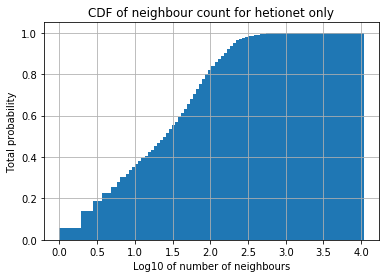

In [24]:
ax = red_neigh["log_neighbours"].hist(
    cumulative=True, bins=100, density=True
)

ax.set_title("CDF of neighbour count for hetionet only")
ax.set_xlabel("Log10 of number of neighbours")
ax.set_ylabel("Total probability")

In [25]:
red_neigh["num_neighbours"].median()

26.0

Text(0,0.5,'Node semantic type')

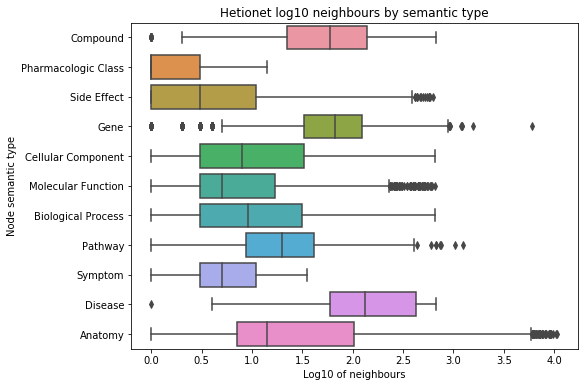

In [26]:
plt.figure(figsize=(8, 6))

ax = sns.boxplot(data=red_neigh, y="het_type", x="log_neighbours")
ax.set_title("Hetionet log10 neighbours by semantic type")
ax.set_xlabel("Log10 of neighbours")
ax.set_ylabel("Node semantic type")

In [27]:
red_neigh.head()

,node_uid,num_neighbours,log_neighbours,node_id,name,het_type
0,0,23,1.361728,DB00795,Sulfasalazine,Compound
1,1,4,0.602060,N0000000151,Histamine H2 Receptor Antagonists,Pharmacologic Class
2,3,2,0.301030,DB04898,Ximelagatran,Compound
3,4,3,0.477121,C0278151,Facial spasm,Side Effect
4,5,7,0.845098,56136,PCDHA13,Gene


In [28]:
lab_neigh.head()

,node_uid,num_neighbours,log_neighbours,node_id,name,het_type
0,0,27,1.431364,DB00795,Sulfasalazine,Compound
1,1,4,0.602060,N0000000151,Histamine H2 Receptor Antagonists,Pharmacologic Class
2,3,2,0.301030,DB04898,Ximelagatran,Compound
3,4,4,0.602060,C0278151,Facial spasm,Side Effect
4,5,8,0.903090,56136,PCDHA13,Gene


In [33]:
b = red_neigh.assign(origin="red").append(lab_neigh.assign(origin="orig"))

In [34]:
b.head()

,node_uid,num_neighbours,log_neighbours,node_id,name,het_type,origin
0,0,23,1.361728,DB00795,Sulfasalazine,Compound,red
1,1,4,0.602060,N0000000151,Histamine H2 Receptor Antagonists,Pharmacologic Class,red
2,3,2,0.301030,DB04898,Ximelagatran,Compound,red
3,4,3,0.477121,C0278151,Facial spasm,Side Effect,red
4,5,7,0.845098,56136,PCDHA13,Gene,red


Text(0,0.5,'Node semantic type')

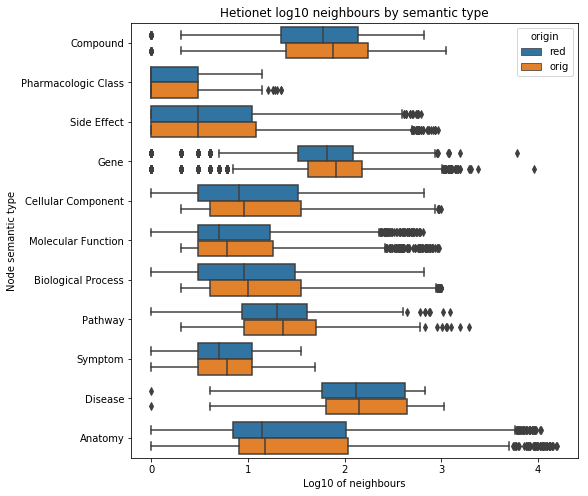

In [38]:
plt.figure(figsize=(8, 8))

ax = sns.boxplot(data=b, y="het_type", x="log_neighbours", hue="origin")

ax.set_title("Hetionet log10 neighbours by semantic type")
ax.set_xlabel("Log10 of neighbours")
ax.set_ylabel("Node semantic type")
